In [41]:
import numpy as np
class adalineGD:
    """ ADAptive LInear Neuron classifier
    
    Parameters:-
    eta - learning rate (float)
    n_iter - passes over the training dataset (int)
    random_state - random number generator seed (int)

    Attributes:-

    w_ - weights after fitting (1d array)
    b_ - bias after fitting (scalar)
    losses_ - mean squared error loss function after each epoch (list)
    """
    
    def __init__(self,eta = 0.01 , n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        """Fit training data
            Paremeters:-
            X - shape (n_examples, n_features)
            Y - shape (n_examples)"""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0,scale = 0.01, size = X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_ += self.eta * 2.0 * X.T.dot(errors)/ X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def net_input(self,X):
        """Calculates net input"""
        return np.dot(X,self.w_) + self.b_
    
    def activation(self,X):
        """Calculates the activation function output"""

        return X
    
    def predict(self,X):
        """Return the predicted class label output"""
        
        return np.where(self.activation(self.net_input(X)) >= 0.5 , 1, 0)
    
    





In [42]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("From url:",s)

df = pd.read_csv(s, header=None,encoding=' utf-8')
print(df.tail())

From url: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


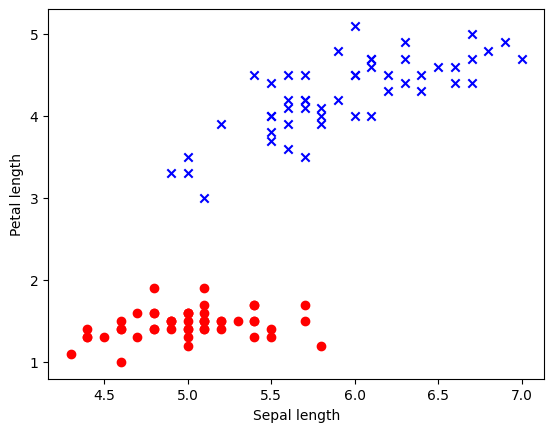

In [43]:
import matplotlib.pyplot as plt
import numpy as np

#select flower type setosa and versicolor
y = df.iloc[0:100, 4]
y = np.where(y== 'Iris-setosa',0,1)

X = df.iloc[0:100,[0,2]].values

#plot the scatter chart
plt.scatter(X[:50,0],X[:50,1],color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue' , marker = 'x', label = 'versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()


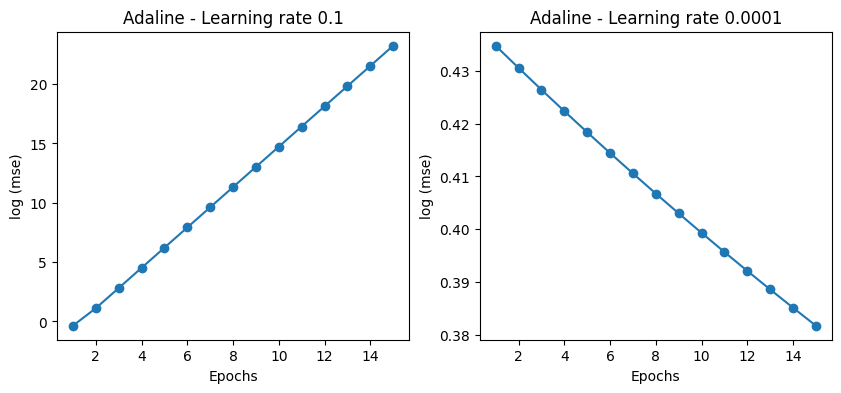

In [44]:
""" plotting loss function for slow and fast learning rate """
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))

ada1 = adalineGD(n_iter = 15,eta = 0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1),np.log10(ada1.losses_),marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log (mse)')
ax[0].set_title("Adaline - Learning rate 0.1")

ada2 = adalineGD(n_iter = 15, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1),ada2.losses_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log (mse)')
ax[1].set_title("Adaline - Learning rate 0.0001")
plt.show()

In [45]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import numpy as np
def plot_decision_regions(X,y, classifier, resolution = 0.02):
    #setup marker generator and color map
    markers = ('o','o')
    colors = ('red','green','cyan','blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha = 0.3,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #plot class example
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y== cl,0],y = X[y==cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],label = f'class {cl}',edgecolor = 'black')

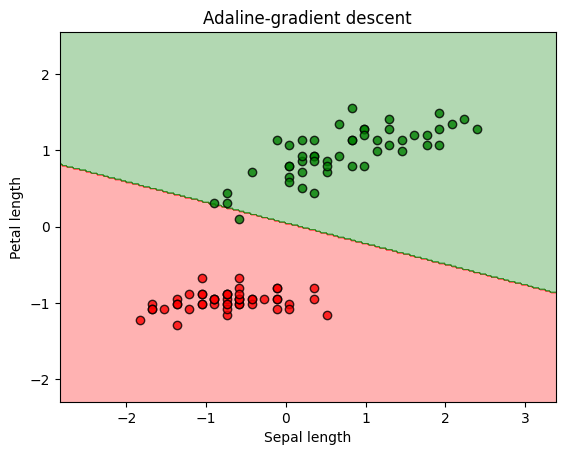

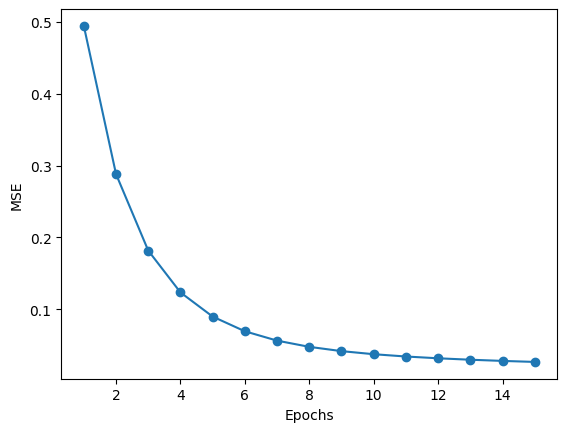

In [48]:
"""Since the features have absurd ranges 
Feature scaling via standardisation and then again training the model"""

import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import numpy as np

X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()

ada_std = adalineGD(n_iter = 15,eta=0.1)
ada_std.fit(X_std,y)

plot_decision_regions(X_std,y,classifier = ada_std)
plt.title('Adaline-gradient descent')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()
plt.plot(range(1,len(ada_std.losses_)+1), ada_std.losses_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

ADAptive LInear Neuron with Stochastic gradient descent implemented 

In [57]:
class adalineSGD:
    """Parameters:-
    eta - learning rate (float)
    n_iter - passes over training dataset (int)
    random_state - random state number generator for random weight initialisation
    shuffle - if this boolean variable is set True, shuffles data to prevent model from learning patterns in the data
    
    w_ - weights after fitting 
    b_ - bias after fitting 
    losses - Mean squared error function value averaged over all training examples """

    def __init__(self,eta = 0.01, n_iter = 10, shuffle = True, random_state = None):

        self.eta = eta
        self.n_iter = n_iter
        self.w_initialised = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self,X,y):
        """Parameters 
        X - (n_examples , n_features)
        y - (n_examples)"""
        
        self._initialise_weights(X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):

            if self.shuffle:
                X,y = self._shuffle_(X,y)
            
            losses = []
            for xi, target in zip(X,y):
                losses.append(self._update_weights(xi,target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self
        
    def partial_fit(self,X,y):
        """Fit training data without reinitialising weights"""
        if not self.w_initialised:
            self._initialise_weights(X.shape[1])
        
        if y.ravel().shape[0]>1:
            for xi, target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        
        return self
    
    def _shuffle_(self,X,y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        
        return X[r],y[r]
    

    def _initialise_weights(self,m):
        """Initialise weights to small random numbers"""

        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = m)
        self.b_ = np.float64(0.)
        self.w_initialised = True

    def _update_weights(self,xi,target):
        """Apply adaline learning rule"""

        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * (error)
        loss = (error**2) 
        return loss
    
    def net_input(self,X):
        """Calculate net input"""

        return np.dot(X,self.w_) + self.b_
    
    def activation(self,X):
        """Compute linear activation based on identity function """

        return X

    def predict(self,X):
        """Return class label predicted output"""

        return np.where(self.activation(self.net_input(X))>= 0.5 , 1, 0)
    

    







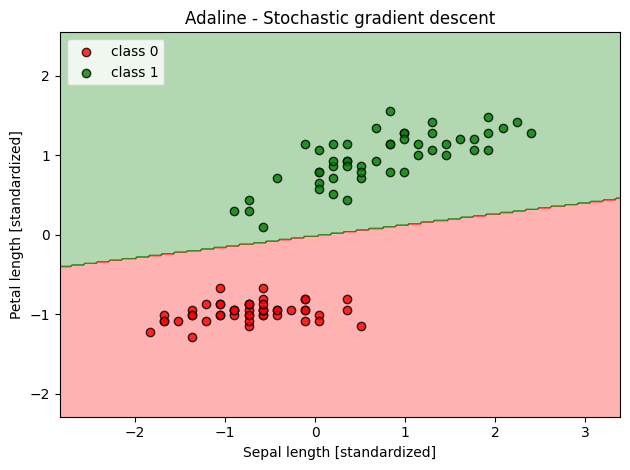

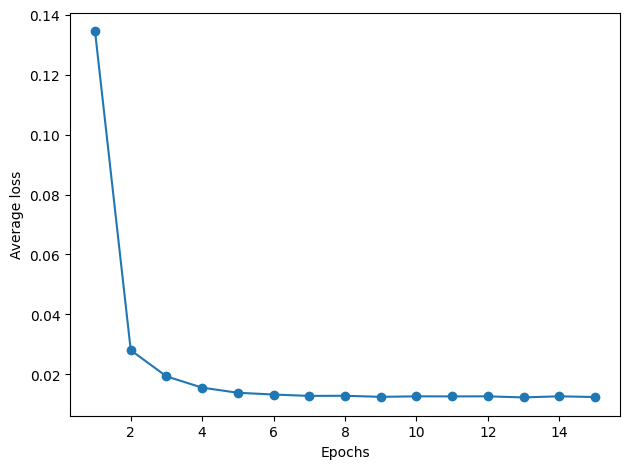

In [58]:
ada_sgd = adalineSGD(n_iter=15, eta=0.01, random_state=1)  
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')  
plt.ylabel('Petal length [standardized]')  
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()